In [5]:
import mne
#file = "/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaaanr/s001_2003_10_14/02_tcp_le/aaaaaanr_s001_t001.edf"
file = "/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaaawu/s001_2003_11_04/02_tcp_le/aaaaaawu_s001_t001.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaaawu/s001_2003_11_04/02_tcp_le/aaaaaawu_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [2]:
type(raw_data)

numpy.ndarray

In [3]:
info

Measurement date,"January 01, 2000 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaaawu
Digitized points,Not available
Good channels,33 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [4]:
channels

['EEG FP1-LE',
 'EEG FP2-LE',
 'EEG F3-LE',
 'EEG F4-LE',
 'EEG C3-LE',
 'EEG C4-LE',
 'EEG A1-LE',
 'EEG A2-LE',
 'EEG P3-LE',
 'EEG P4-LE',
 'EEG O1-LE',
 'EEG O2-LE',
 'EEG F7-LE',
 'EEG F8-LE',
 'EEG T3-LE',
 'EEG T4-LE',
 'EEG T5-LE',
 'EEG T6-LE',
 'EEG FZ-LE',
 'EEG CZ-LE',
 'EEG PZ-LE',
 'EEG OZ-LE',
 'EEG PG1-LE',
 'EEG PG2-LE',
 'EEG EKG-LE',
 'EEG SP2-LE',
 'EEG SP1-LE',
 'EEG 28-LE',
 'EEG 29-LE',
 'EEG 30-LE',
 'EEG T1-LE',
 'EEG T2-LE',
 'PHOTIC PH']

In [5]:
raw_data.shape

(33, 332250)

1329.0
-6.556710335314831e-06


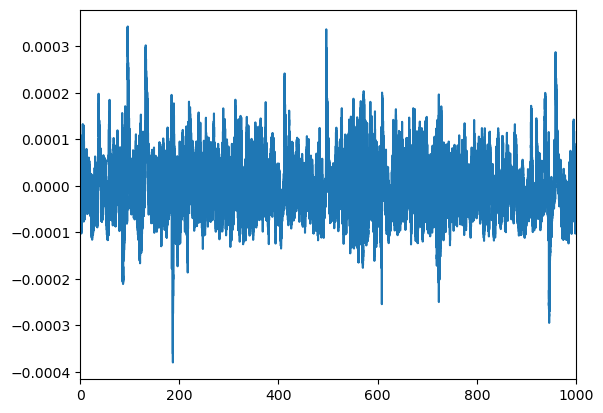

In [6]:
import matplotlib.pyplot as plt
import numpy as np

info.keys()
#seconds = np.arange(info["sfreq"])
#seconds
EEG_FP1_LE = raw_data[0]
sfreq = info["sfreq"]
total_time = len(EEG_FP1_LE) / sfreq
seconds = seconds = np.arange(0, total_time, 1/sfreq)
print(total_time)
print(np.mean(EEG_FP1_LE))
len(EEG_FP1_LE)
plt.xlim(0,1000)
plt.plot(seconds, EEG_FP1_LE)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (332250,) and (303500,)

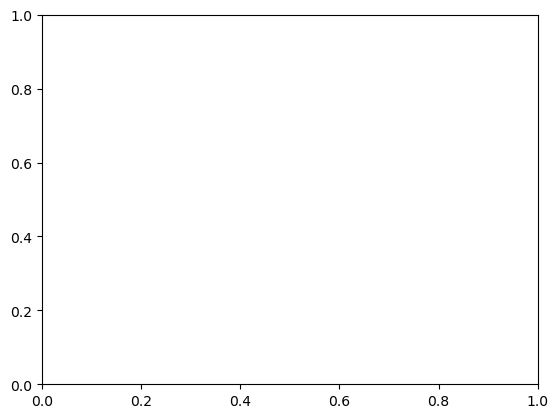

In [7]:
import matplotlib.pyplot as plt
import numpy as np

info.keys()
#seconds = np.arange(info["sfreq"])
sfreq = info["sfreq"]
T= 1/sfreq
total_time = len(EEG_FP1_LE) / sfreq
seconds = seconds = np.arange(0, total_time, 1/sfreq)
EEG_FP1_LE = raw_data[0][0:303500]
N_samples = len(EEG_FP1_LE)
plt.plot(seconds, EEG_FP1_LE)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (151750,) and (166125,)

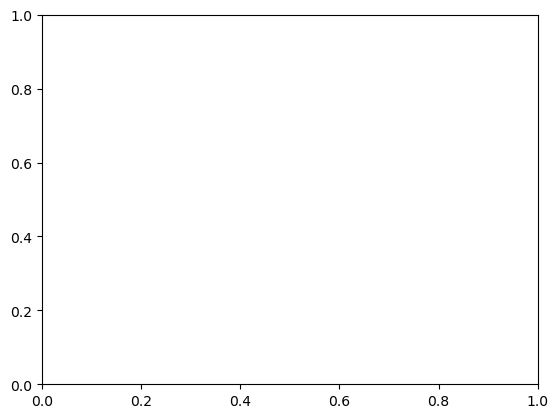

In [8]:
#frequency plot
S = np.fft.fft(EEG_FP1_LE)
freq_axis = np.fft.fftfreq(N_samples, T)[:N_samples//2]
S_mag = np.abs(S)
#S_phase = np.angle(S)
#plt.plot(seconds[len(seconds)//2:],S_mag[len(seconds)//2:])
plt.plot(freq_axis,np.log(S_mag)[:len(seconds)//2])
#plt.plot(seconds,S_phase,'.-')

ValueError: x and y must have same first dimension, but have shapes (332250,) and (303500,)

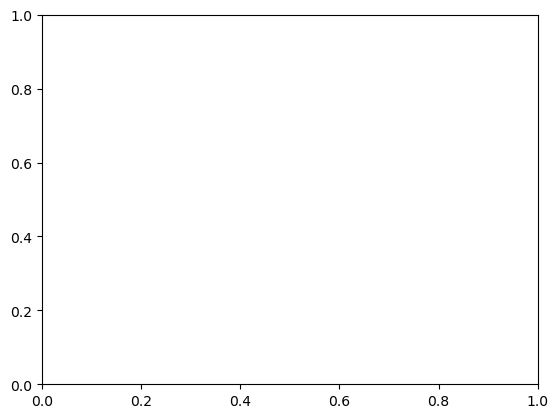

In [9]:
from scipy import signal
sos = signal.butter(30,[0.1,118], 'bp', fs=sfreq, output='sos')
filtered = signal.sosfilt(sos, EEG_FP1_LE)
plt.plot(seconds, filtered)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (332250,) and (303500,)

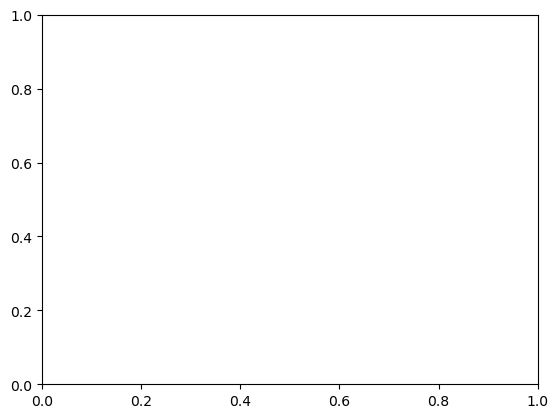

In [10]:
from scipy import signal
sos = signal.butter(30,[59.9,60.1], 'bs', fs=sfreq, output='sos')
sos2 = signal.butter(30,[0.1,118], 'bp', fs=sfreq, output='sos')
filtered = signal.sosfilt(sos, EEG_FP1_LE)
filtered2 = signal.sosfilt(sos2, filtered)
#plt.plot(seconds, filtered)
plt.plot(seconds, filtered2)
plt.show()

In [11]:
EEG_FP1_LE

array([6.16455397e-05, 6.13403638e-05, 6.40869472e-05, ...,
       1.40380932e-05, 1.77002045e-05, 1.06811579e-05])

In [12]:
filtered[:len(seconds)//2]

array([ 5.87551537e-05,  5.81099540e-05,  6.63291558e-05, ...,
       -1.81180749e-05, -1.33203410e-05, -6.04346461e-06])

ValueError: x and y must have same first dimension, but have shapes (151750,) and (166125,)

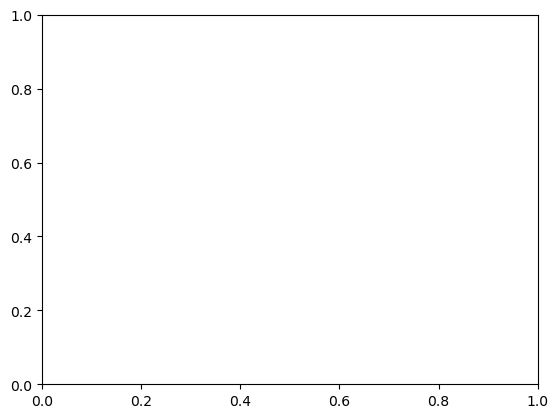

In [13]:
#plotting filtered data of the frequency domain
#frequency plot
S = np.fft.fft(filtered2)
freq_axis = np.fft.fftfreq(N_samples, T)[:N_samples//2]
S_mag = np.abs(S)
#S_phase = np.angle(S)
#plt.plot(seconds[len(seconds)//2:],S_mag[len(seconds)//2:])
plt.plot(freq_axis,np.log(S_mag)[:len(seconds)//2])
#plt.plot(seconds,S_phase,'.-')

ValueError: x and y must have same first dimension, but have shapes (332250,) and (303500,)

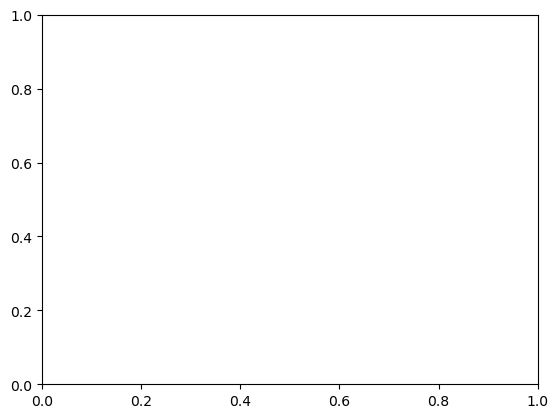

In [14]:
from scipy import signal
sos = signal.butter(30,60, 'lp', fs=sfreq, output='sos')
filtered_lp = signal.sosfilt(sos, EEG_FP1_LE)
plt.plot(seconds, filtered_lp)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (332250,) and (303500,)

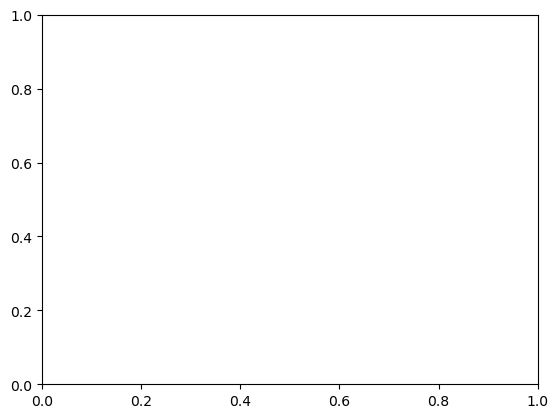

In [15]:
from scipy import signal
sos = signal.butter(30,60, 'hp', fs=sfreq, output='sos')
filtered_hp = signal.sosfilt(sos, EEG_FP1_LE)
plt.plot(seconds, filtered_hp)
plt.show()

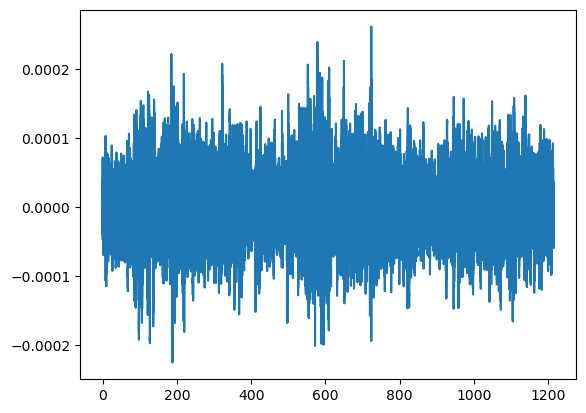

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

info.keys()
#seconds = np.arange(info["sfreq"])
sfreq = info["sfreq"]
T= 1/sfreq
total_time = len(EEG_FP1_LE) / sfreq
seconds = seconds = np.arange(0, total_time, 1/sfreq)
EEG_FP1_LE = raw_data[0][0:303500]
N_samples = len(EEG_FP1_LE)
sos = signal.butter(30,[0.1,118], 'bp', fs=sfreq, output='sos')
filtered = signal.sosfilt(sos, EEG_FP1_LE)
plt.plot(seconds, filtered)
plt.show()

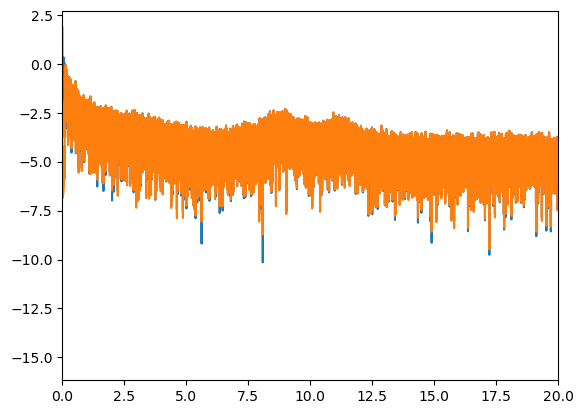

In [17]:
# #test

def preprocess_channel(channel, sfreq):
    # Time-related parameters
    T = 1 / sfreq
    total_time = len(channel) / sfreq
    seconds = np.arange(0, total_time, 1/sfreq)
    N_samples = len(channel)
    #sos = signal.butter(30, [0.1, 118], 'bp', fs=sfreq, output='sos')
    sos = signal.butter(30, 0.1, 'hp', fs=sfreq, output='sos')
    sos2 = signal.butter(30, [59.5, 60.5], 'bs', fs=sfreq, output='sos')
    sos3 = signal.butter(30, [119.5, 120.5], 'bs', fs=sfreq, output='sos')
    filtered = signal.sosfilt(sos, channel)
    filtered2 = signal.sosfilt(sos2, filtered)
    filtered3 = signal.sosfilt(sos3, filtered2)
    
    return filtered3

def preprocess_channels(channels_data, sfreq):
    new_channels = []
    for channel in channels_data:
        new_channel = preprocess_channel(channel, sfreq)
        new_channels.append(new_channel)
    return new_channels

sfreq = info["sfreq"]
# Call preprocess_channels with the list of channels and sfreq
preprocessed_channels = preprocess_channels(raw_data, sfreq)

# Call preprocess_channel for a single channel (replace current_channel with the actual channel data)
current_channel = raw_data[1]
preprocessed_single_channel = preprocess_channel(current_channel, sfreq)

T= 1/sfreq
total_time = len(current_channel) / sfreq
seconds = np.arange(0, total_time, 1/sfreq)
N_samples = len(current_channel)
# plt.plot(seconds, current_channel)
# plt.plot(seconds, preprocessed_single_channel)

#plotting filtered data of the frequency domain
#frequency plot
S = np.fft.fft(current_channel)
S2 = np.fft.fft(preprocessed_single_channel)
freq_axis = np.fft.fftfreq(N_samples, T)[:N_samples//2]
S_mag = np.abs(S)
S_mag2 = np.abs(S2)
#S_phase = np.angle(S)
#plt.plot(seconds[len(seconds)//2:],S_mag[len(seconds)//2:])
plt.plot(freq_axis,np.log(S_mag)[:len(seconds)//2])
plt.plot(freq_axis,np.log(S_mag2)[:len(seconds)//2])
#plt.plot(seconds,S_phase,'.-')
plt.xlim(0,20)
plt.show()




In [18]:
type(raw_data[0])

numpy.ndarray

In [19]:
preprocess_channel(EEG_FP1_LE,sfreq)
preprocess_channels(channels)

TypeError: preprocess_channels() missing 1 required positional argument: 'sfreq'

1329.0
-1.978073696180729e-05


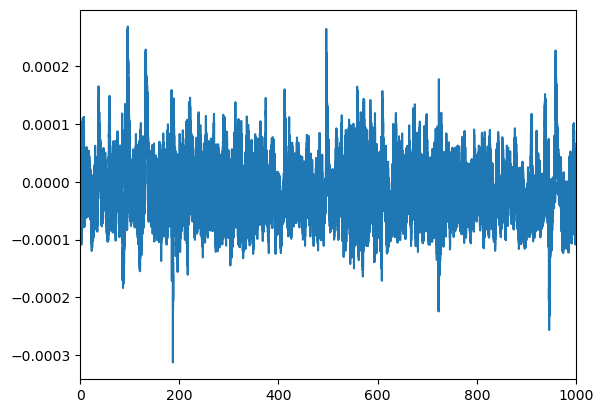

In [20]:
# plotting unflitered data for channel EEGFP2LE
import matplotlib.pyplot as plt
import numpy as np

info.keys()
#seconds = np.arange(info["sfreq"])
#seconds
EEGFP2LE = raw_data[1]
sfreq = info["sfreq"]
total_time2 = len(EEGFP2LE) / sfreq
seconds2 = np.arange(0, total_time2, 1/sfreq)
print(total_time2)
print(np.mean(EEGFP2LE))
len(EEGFP2LE)
plt.xlim(0,1000)
plt.plot(seconds2, EEGFP2LE)
plt.show()

(0.0, 20.0)

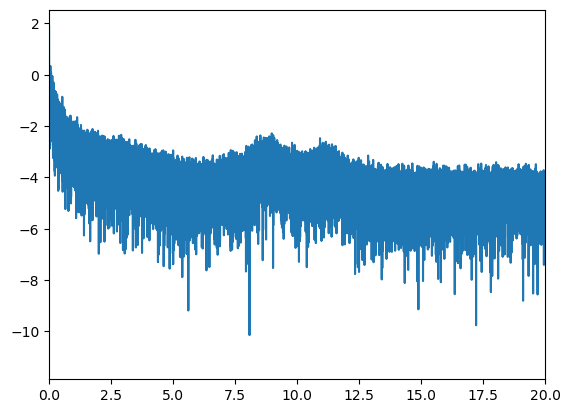

In [21]:
N_samples2 = len(EEGFP2LE)
S2 = np.fft.fft(EEGFP2LE)
freq_axis2 = np.fft.fftfreq(N_samples2, T)[:N_samples2//2]
S_mag2 = np.abs(S2)
#S_phase = np.angle(S)
#plt.plot(seconds[len(seconds)//2:],S_mag[len(seconds)//2:])
plt.plot(freq_axis2,np.log(S_mag2)[:len(seconds2)//2])
plt.xlim((0, 20))
#plt.plot(seconds,S_phase,'.-')

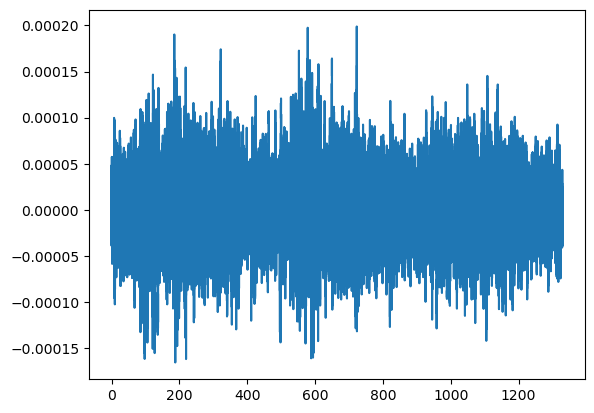

In [22]:
from scipy import signal
sos = signal.butter(30,[0.1,118], 'bp', fs=sfreq, output='sos')
filtered = signal.sosfilt(sos, EEGFP2LE)
plt.plot(seconds2, filtered)
plt.show()

In [23]:
len(EEGFP2LE)

332250

In [24]:
channels

['EEG FP1-LE',
 'EEG FP2-LE',
 'EEG F3-LE',
 'EEG F4-LE',
 'EEG C3-LE',
 'EEG C4-LE',
 'EEG A1-LE',
 'EEG A2-LE',
 'EEG P3-LE',
 'EEG P4-LE',
 'EEG O1-LE',
 'EEG O2-LE',
 'EEG F7-LE',
 'EEG F8-LE',
 'EEG T3-LE',
 'EEG T4-LE',
 'EEG T5-LE',
 'EEG T6-LE',
 'EEG FZ-LE',
 'EEG CZ-LE',
 'EEG PZ-LE',
 'EEG OZ-LE',
 'EEG PG1-LE',
 'EEG PG2-LE',
 'EEG EKG-LE',
 'EEG SP2-LE',
 'EEG SP1-LE',
 'EEG 28-LE',
 'EEG 29-LE',
 'EEG 30-LE',
 'EEG T1-LE',
 'EEG T2-LE',
 'PHOTIC PH']

In [2]:
def plot_patient_eeg_and_freq(filename, channel = 0):
    data = mne.io.read_raw_edf(filename)
    raw_data = data.get_data()
    # you can get the metadata included in the file and a list of all channels:
    info = data.info
    channels = data.ch_names
    
    sfreq = info["sfreq"]
    # Call preprocess_channels with the list of channels and sfreq
    preprocessed_channels = preprocess_channels(raw_data, sfreq)

    # Call preprocess_channel for a single channel (replace current_channel with the actual channel data)
    current_channel = raw_data[channel]
    preprocessed_single_channel = preprocess_channel(current_channel, sfreq)

    T= 1/sfreq
    total_time = len(current_channel) / sfreq
    seconds = np.arange(0, total_time, 1/sfreq)
    N_samples = len(current_channel)
    # plt.plot(seconds, current_channel)
    #plt.plot(seconds, preprocessed_single_channel)

    #plotting filtered data of the frequency domain
    #frequency plot
    #S = np.fft.fft(current_channel)
    S2 = np.fft.fft(preprocessed_single_channel)
    freq_axis = np.fft.fftfreq(N_samples, T)[:N_samples//2]
    #S_mag = np.abs(S)
    S_mag2 = np.abs(S2)
    #S_phase = np.angle(S)
    #plt.plot(seconds[len(seconds)//2:],S_mag[len(seconds)//2:])
    #plt.plot(freq_axis,np.log(S_mag)[:len(seconds)//2])
    #plt.plot(freq_axis,np.log(S_mag2)[:len(seconds)//2])
    #plt.plot(seconds,S_phase,'.-')
    
    fig, axs = plt.subplots(2)
    fig.suptitle(channels[channel])
    axs[0].plot(seconds, preprocessed_single_channel)
    axs[1].scatter(freq_axis,np.log(S_mag2)[:len(seconds)//2])
    
    fig.show()
    print(bumpAvg(np.log(S_mag2)[:len(seconds)//2],freq_axis))


    
    

In [3]:
def bumpAvg(S_mag,freq_axis):
    bool_inside_bump = np.logical_and(freq_axis >= 7, freq_axis <= 12.5)

    bool_around_7 = np.logical_and (freq_axis < 7, freq_axis > 6.8)
    
    mean_in_bump = np.mean(S_mag[bool_inside_bump])
    mean_around_7 = np.mean(S_mag[bool_around_7])
    
    return mean_in_bump - mean_around_7

In [4]:
plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaaawu/s001_2003_11_04/02_tcp_le/aaaaaawu_s001_t001.edf",5)
#plt.xlim((0, 20))

NameError: name 'mne' is not defined

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaabdn/s001_2003_11_17/02_tcp_le/aaaaabdn_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.18546125844760386


/tmp/ipykernel_12653/971578381.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 20.0)

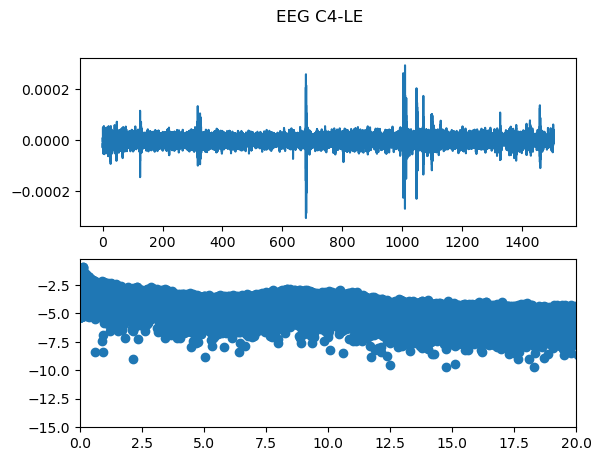

In [28]:
plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaabdn/s001_2003_11_17/02_tcp_le/aaaaabdn_s001_t000.edf",5)
plt.xlim(0,20)

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaaoui/s001_2013_02_26/01_tcp_ar/aaaaaoui_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.01841765495517933


/tmp/ipykernel_12653/971578381.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 20.0)

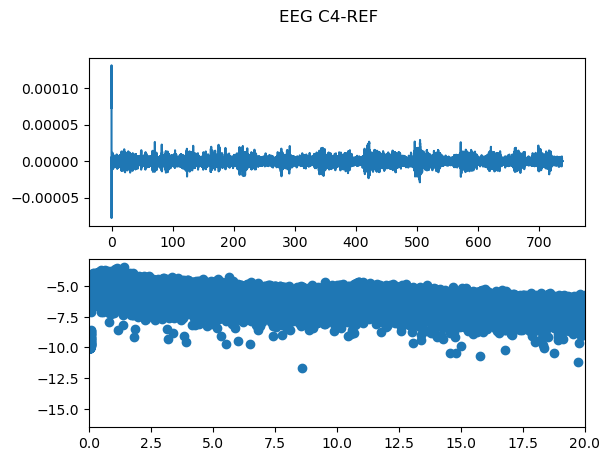

In [29]:
plot_patient_eeg_and_freq("epilepsy_edf/aaaaaoui/s001_2013_02_26/01_tcp_ar/aaaaaoui_s001_t001.edf",5)
plt.xlim((0, 20))

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.33539019945115167
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_12653/971578381.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


-0.20271586068032565
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.2683904168441895
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.11002923457246538
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.07899879816717892
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info st

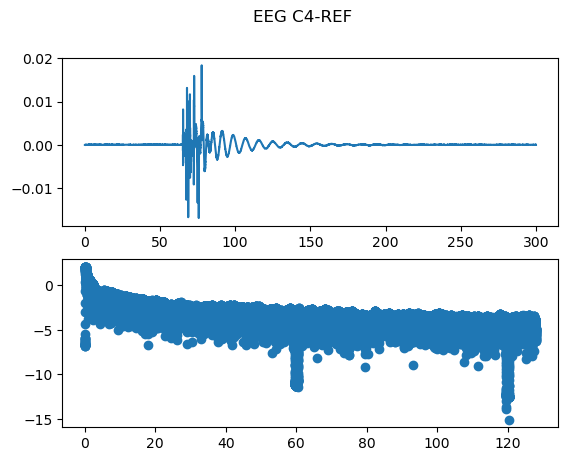

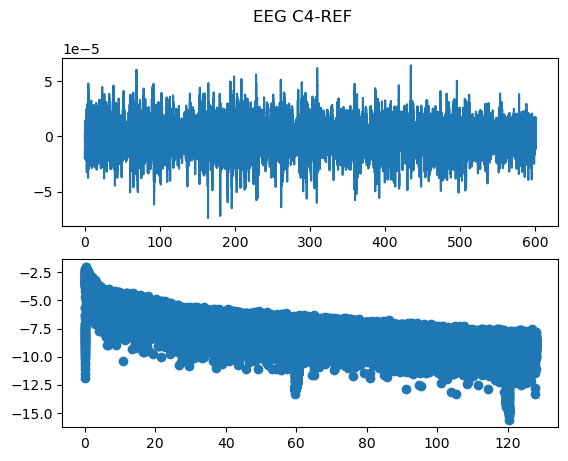

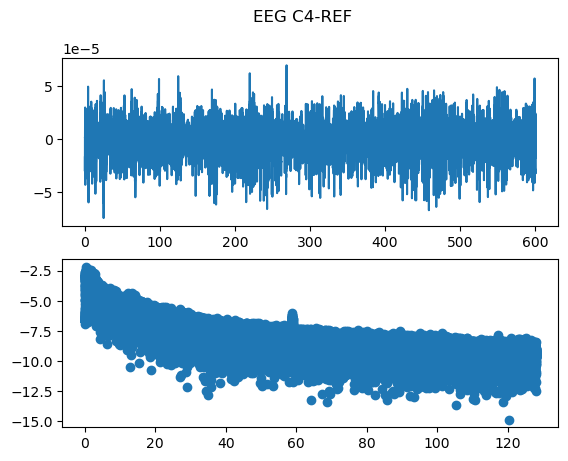

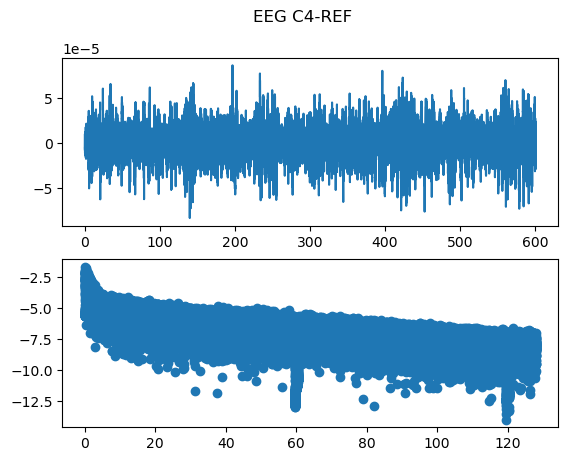

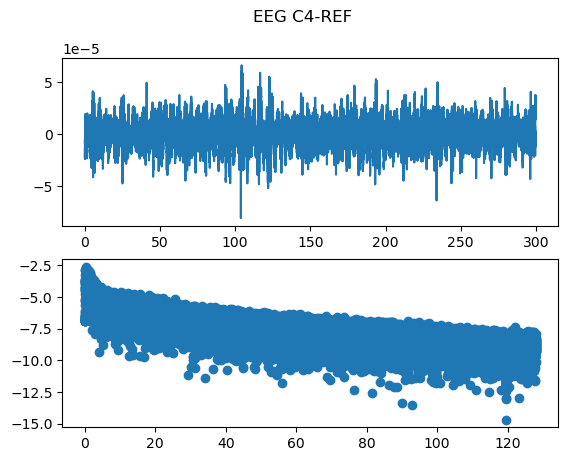

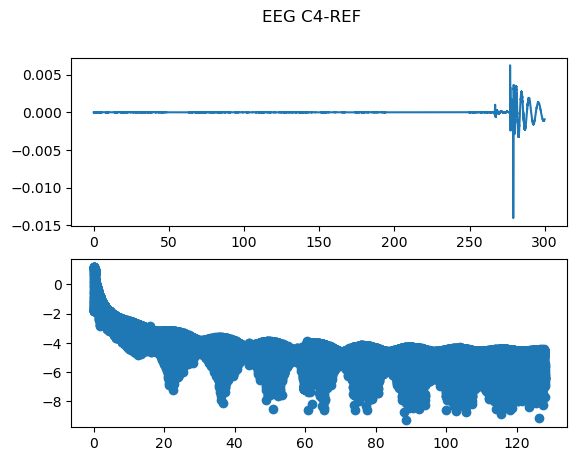

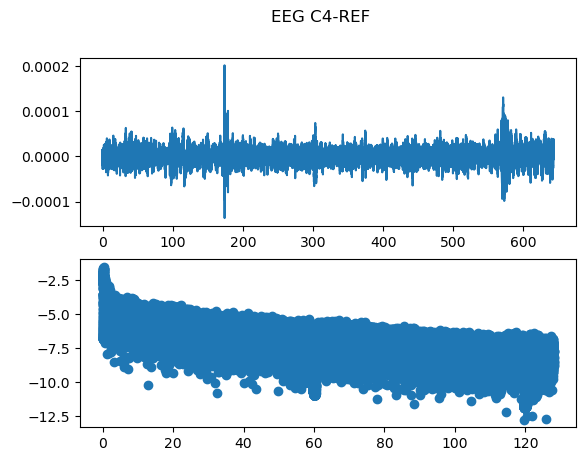

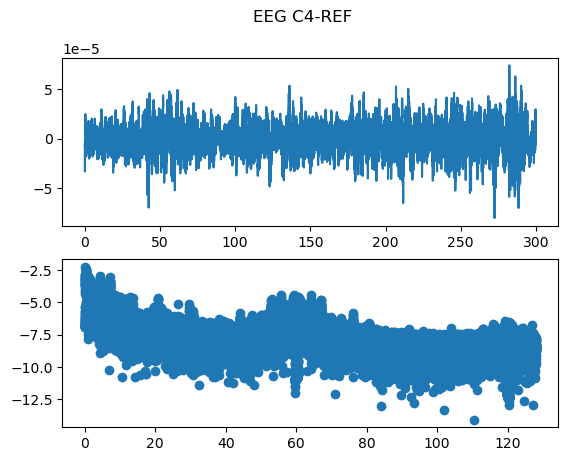

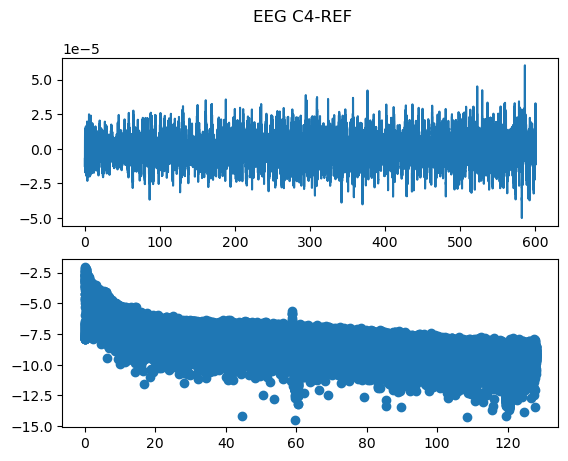

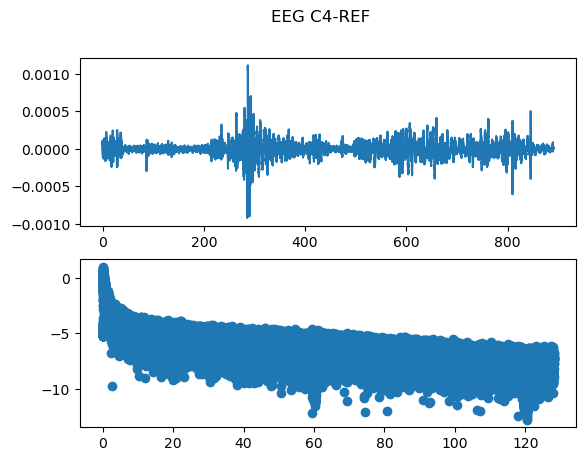

In [30]:
# patient aaaaankz

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t000.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t001.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t002.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t003.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t004.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t005.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t006.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t007.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t008.edf",5)
#plt.xlim((0, 20))

plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaankz/s003_2012_04_24/01_tcp_ar/aaaaankz_s003_t009.edf",5)
#plt.xlim((0, 20))

In [31]:
#patient aaaaamnj
def preprocess_channel_aaaaamnj(channel, sfreq):
    # Time-related parameters
    T = 1 / sfreq
    total_time = len(channel) / sfreq
    seconds = np.arange(0, total_time, 1/sfreq)
    N_samples = len(channel)
    sos = signal.butter(30, [59.9, 60.1], 'bs', fs=sfreq, output='sos')
    sos3 = signal.butter(30, [119.9, 120.1], 'bs', fs=sfreq, output='sos')
    sos4 = signal.butter(30, [179.9, 180.1], 'bs', fs=sfreq, output='sos')
    sos5 = signal.butter(30, [239.9, 240.1], 'bs', fs=sfreq, output='sos')
    #sos2 = signal.butter(30, [0.1, 248], 'bp', fs=sfreq, output='sos')
    sos2 = signal.butter(30, 0.1, 'hp', fs=sfreq, output='sos')
    filtered = signal.sosfilt(sos, channel)
    filtered2 = signal.sosfilt(sos2, filtered)
    filtered3 = signal.sosfilt(sos3, filtered2)
    filtered4 = signal.sosfilt(sos4, filtered3)
    filtered5 = signal.sosfilt(sos5, filtered4)
    
    
    return filtered5

def preprocess_channels_aaaaamnj(channels_data, sfreq):
    new_channels = []
    for channel in channels_data:
        new_channel = preprocess_channel_aaaaamnj(channel, sfreq)
        new_channels.append(new_channel)
    return new_channels
def plot_patient_aaaaamnj(filename, channel = 0):
    data = mne.io.read_raw_edf(filename)
    raw_data = data.get_data()
    # you can get the metadata included in the file and a list of all channels:
    info = data.info
    channels = data.ch_names
    
    sfreq = info["sfreq"]
    # Call preprocess_channels with the list of channels and sfreq
    preprocessed_channels_aaaaamnj = preprocess_channels_aaaaamnj(raw_data, sfreq)

    # Call preprocess_channel for a single channel (replace current_channel with the actual channel data)
    current_channel = raw_data[channel]
    preprocessed_single_channel_aaaaamnj = preprocess_channel_aaaaamnj(current_channel, sfreq)

    T= 1/sfreq
    total_time = len(current_channel) / sfreq
    seconds = np.arange(0, total_time, 1/sfreq)
    N_samples = len(current_channel)
    # plt.plot(seconds, current_channel)
    #plt.plot(seconds, preprocessed_single_channel)

    #plotting filtered data of the frequency domain
    #frequency plot
    #S = np.fft.fft(current_channel)
    S2 = np.fft.fft(preprocessed_single_channel_aaaaamnj)
    freq_axis = np.fft.fftfreq(N_samples, T)[:N_samples//2]
    #S_mag = np.abs(S)
    S_mag2 = np.abs(S2)
    #S_phase = np.angle(S)
    #plt.plot(seconds[len(seconds)//2:],S_mag[len(seconds)//2:])
    #plt.plot(freq_axis,np.log(S_mag)[:len(seconds)//2])
    #plt.plot(freq_axis,np.log(S_mag2)[:len(seconds)//2])
    #plt.plot(seconds,S_phase,'.-')
    
    fig, axs = plt.subplots(2)
    fig.suptitle(channels[channel])
    axs[0].plot(seconds, preprocessed_single_channel_aaaaamnj)
    axs[1].scatter(freq_axis,np.log(S_mag2)[:len(seconds)//2])
    
    fig.show()
    print(bumpAvg_aaaaamnj(np.log(S_mag2)[:len(seconds)//2],freq_axis))

def bumpAvg_aaaaamnj(S_mag,freq_axis):
    bool_inside_bump = np.logical_and(freq_axis >= 110, freq_axis <= 130)

    bool_around_110 = np.logical_and(freq_axis < 110, freq_axis > 108)
    
    mean_in_bump = np.mean(S_mag[bool_inside_bump])
    mean_around_110 = np.mean(S_mag[bool_around_110])
    
    return mean_in_bump - mean_around_110

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.08922043729211104
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_12653/1856797588.py:69: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


-0.1728120354461371
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.007913166494149415
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.16747165507402606
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.14746389500773294
Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info s

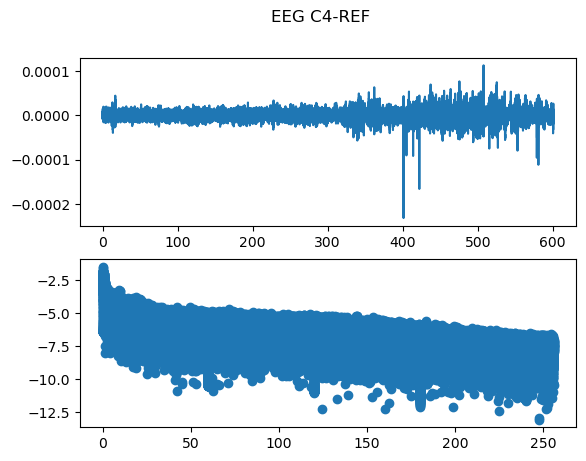

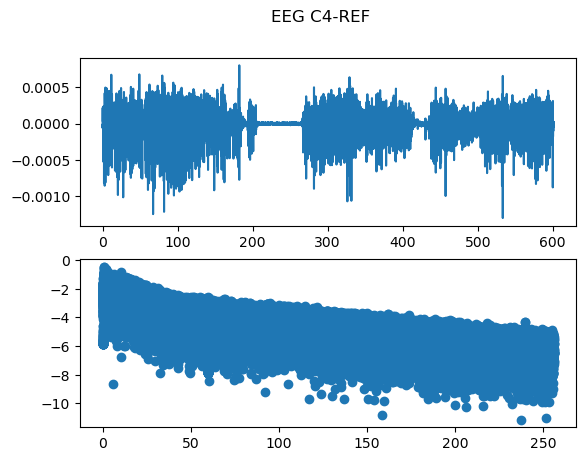

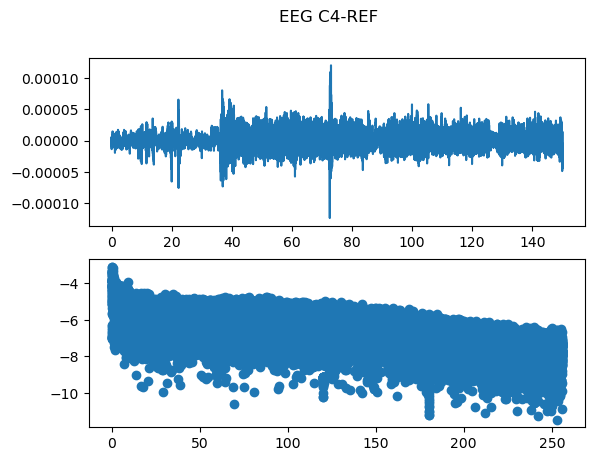

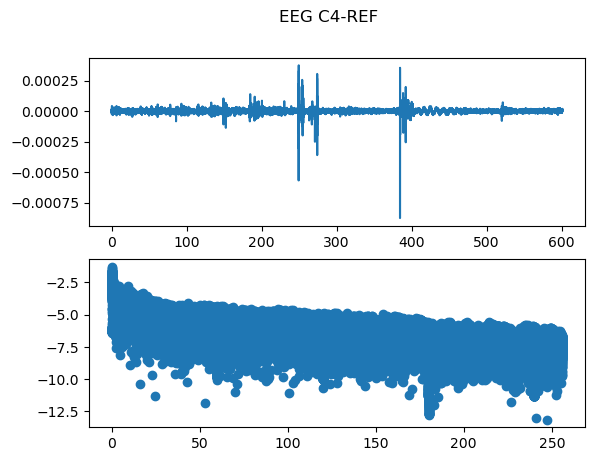

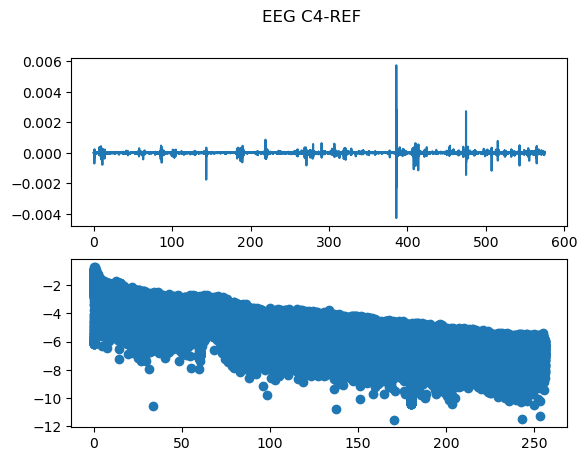

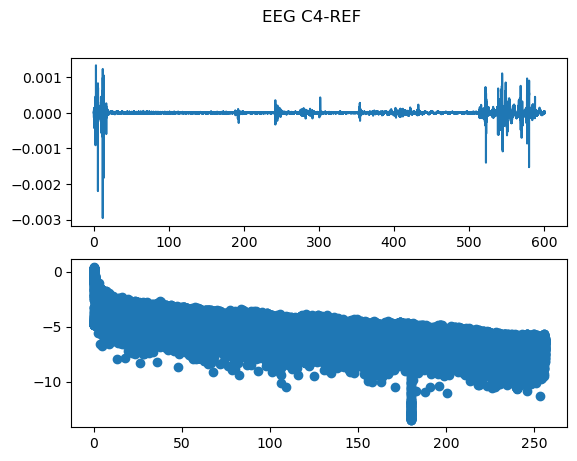

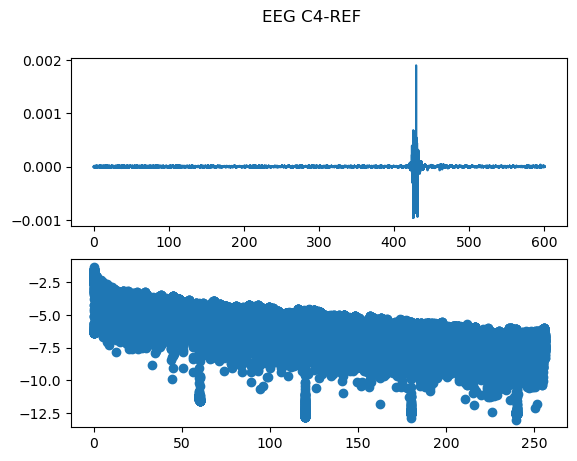

In [32]:
#patient aaaaamnj
plot_patient_aaaaamnj("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t000.edf",5)
#plt.xlim((100, 150))
plot_patient_aaaaamnj("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t001.edf",5)
#plt.xlim((100, 150))
plot_patient_aaaaamnj("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t002.edf",5)
#plt.xlim((100, 150))
plot_patient_aaaaamnj("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t003.edf",5)
#plt.xlim((100, 150))
plot_patient_aaaaamnj("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t004.edf",5)
#plt.xlim((100, 150))
plot_patient_aaaaamnj("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t005.edf",5)
#plt.xlim((100, 150))
plot_patient_aaaaamnj("/Users/poulomigangopadhyay/Desktop/epilepsy/epilepsy_edf/aaaaamnj/s007_2012_06_20/01_tcp_ar/aaaaamnj_s007_t006.edf",5)
#plt.xlim((100, 150))

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/no_epilepsy_edf/aaaaaebo/s001_2006_04_13/02_tcp_le/aaaaaebo_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.17500669339590758


/tmp/ipykernel_12653/971578381.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 20.0)

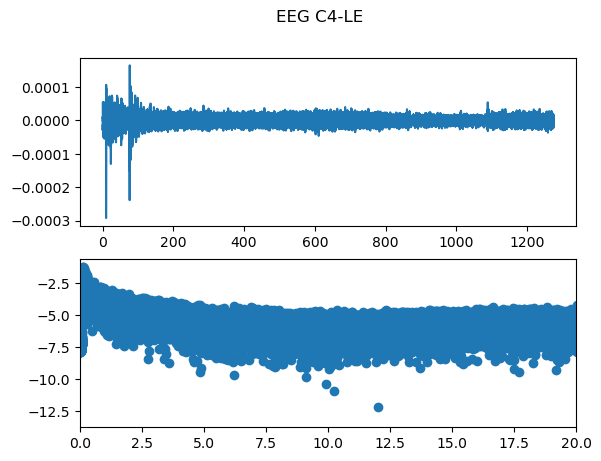

In [33]:
#no epilepsy
plot_patient_eeg_and_freq("no_epilepsy_edf/aaaaaebo/s001_2006_04_13/02_tcp_le/aaaaaebo_s001_t000.edf",5)
plt.xlim((0, 20))

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/no_epilepsy_edf/aaaaafiy/s001_2006_12_14/02_tcp_le/aaaaafiy_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.16750819918088133


/tmp/ipykernel_12653/971578381.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 20.0)

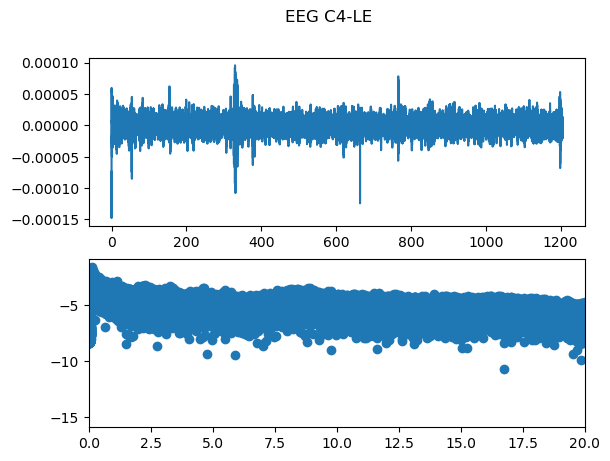

In [34]:
plot_patient_eeg_and_freq("no_epilepsy_edf/aaaaafiy/s001_2006_12_14/02_tcp_le/aaaaafiy_s001_t000.edf",5)
plt.xlim((0, 20))

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/no_epilepsy_edf/aaaaaibz/s001_2011_11_24/01_tcp_ar/aaaaaibz_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.6715673983536288


/tmp/ipykernel_12653/971578381.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 20.0)

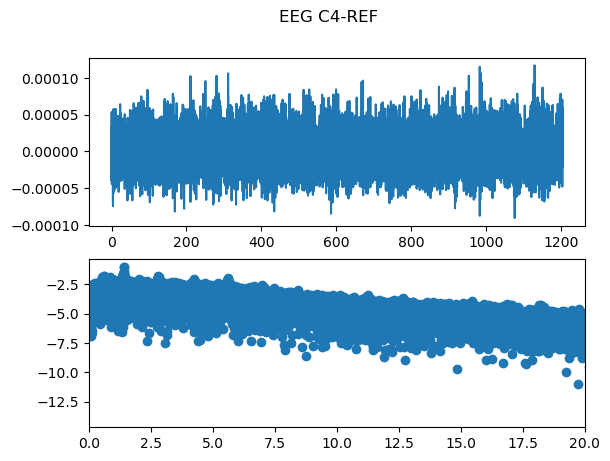

In [35]:
plot_patient_eeg_and_freq("no_epilepsy_edf/aaaaaibz/s001_2011_11_24/01_tcp_ar/aaaaaibz_s001_t000.edf",5)
plt.xlim((0, 20))

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/no_epilepsy_edf/aaaaakfq/s001_2010_09_09/01_tcp_ar/aaaaakfq_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
0.2536180550324909


/tmp/ipykernel_12653/971578381.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 20.0)

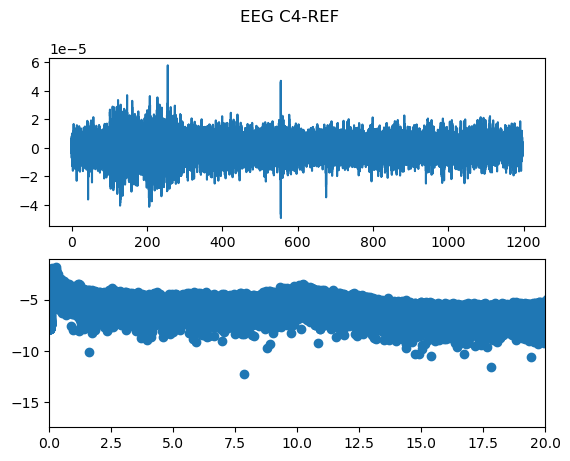

In [36]:
plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/no_epilepsy_edf/aaaaakfq/s001_2010_09_09/01_tcp_ar/aaaaakfq_s001_t001.edf",5)
plt.xlim((0, 20))

Extracting EDF parameters from /Users/poulomigangopadhyay/Desktop/epilepsy/no_epilepsy_edf/aaaaapgp/s001_2013_05_31/01_tcp_ar/aaaaapgp_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
-0.29350692652662813


/tmp/ipykernel_12653/971578381.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.0, 20.0)

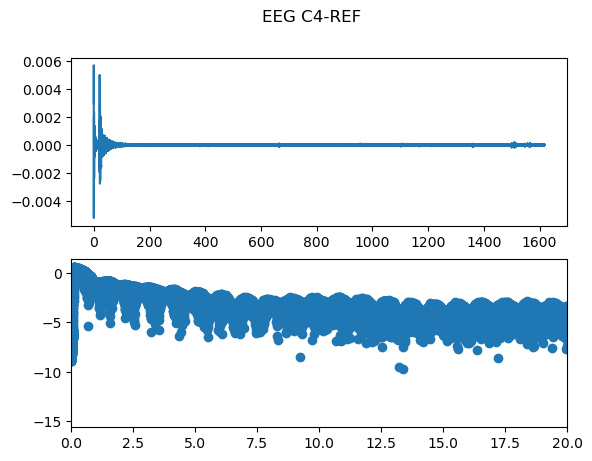

In [37]:
plot_patient_eeg_and_freq("/Users/poulomigangopadhyay/Desktop/epilepsy/no_epilepsy_edf/aaaaapgp/s001_2013_05_31/01_tcp_ar/aaaaapgp_s001_t000.edf",5)
plt.xlim((0, 20))

In [38]:
import os

def bump_avg_all_files(folderName,channel=0,max_files_read=10000):
    bump_avg_list = []
    n_files_read = 0
    for root, dirs, files in os.walk(folderName, topdown=False):
        
        for filename in files:
            if (n_files_read >= max_files_read):
                return bump_avg_list
            #if edf, run bump_avg
            #function should return a list of all bump averages
            #run this function for both epileptic and non epileptic folders
            if (os.path.splitext(filename)[1] == '.edf'):
                n_files_read += 1
                data = mne.io.read_raw_edf(os.path.join(root, filename), verbose="warning")
                raw_data = data.get_data()
                # you can get the metadata included in the file and a list of all channels:
                info = data.info
                channels = data.ch_names

                sfreq = info["sfreq"]
                # Call preprocess_channels with the list of channels and sfreq
                preprocessed_channels = preprocess_channels(raw_data, sfreq)

                # Call preprocess_channel for a single channel (replace current_channel with the actual channel data)
                current_channel = raw_data[channel]
                preprocessed_single_channel = preprocess_channel(current_channel, sfreq)

                T= 1/sfreq
                total_time = len(current_channel) / sfreq
                seconds = np.arange(0, total_time, 1/sfreq)
                N_samples = len(current_channel)

                #plotting filtered data of the frequency domain
                #frequency plot
                S2 = np.fft.fft(preprocessed_single_channel)
                freq_axis = np.fft.fftfreq(N_samples, T)[:N_samples//2]
                S_mag2 = np.abs(S2)
                
                bump_avg = bumpAvg(np.log(S_mag2)[:len(seconds)//2],freq_axis)
                bump_avg_list.append(bump_avg)
    return bump_avg_list
            

In [39]:
epilepsy_bump_avg_list = bump_avg_all_files('epilepsy_edf')

/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Applications/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [40]:
nonepilepsy_bump_avg_list = bump_avg_all_files('no_epilepsy_edf')

{'whiskers': [<matplotlib.lines.Line2D at 0x143ef2250>,
 'caps': [<matplotlib.lines.Line2D at 0x143ef04d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x143f40cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x143f07610>,
 'fliers': [<matplotlib.lines.Line2D at 0x143f05150>,
 'means': []}

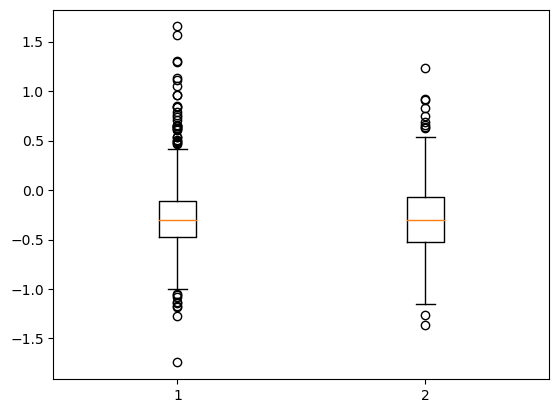

In [41]:
import pandas as pd
#epilepsy_series = pd.Series(epilepsy_bump_avg_list).dropna()
epilepsy_series = pd.Series(epilepsy_bump_avg_list)
nonepilepsy_series = pd.Series(nonepilepsy_bump_avg_list)
epilepsy_series.to_csv('Epilepsy.csv', index=False)
nonepilepsy_series.to_csv('Nonepilepsy.csv', index=False)
plt.boxplot([epilepsy_series.dropna(),nonepilepsy_series.dropna()])



In [42]:

scipy.stats.ttest_ind(epilepsy_series.dropna(),nonepilepsy_series.dropna())

TtestResult(statistic=0.7910303654790014, pvalue=0.42901092369478167, df=2216.0)

In [1]:
len(epilepsy_series)

NameError: name 'epilepsy_series' is not defined

In [43]:
epilepsy_patient_with_low_bumpAvg = np.where(epilepsy_series<0)

In [44]:
np.where(epilepsy_series<0)[0].size

1501

In [45]:
epilepsy_patient_with_low_bumpAvg

(array([   0,    2,    3, ..., 1780, 1781, 1782]),)

In [46]:

epilepsy_patient_list = []
for root, dirs, files in os.walk("epilepsy_edf", topdown=False):
    for patient in files:
        epilepsy_patient_list.append(os.path.join(root, patient))

In [62]:
for index in range(len(epilepsy_patient_with_low_bumpAvg)):
    value = epilepsy_patient_with_low_bumpAvg[index]
    
    print(epilepsy_patient_list[epilepsy_patient_with_low_bumpAvg[value]])

#for index in range(len(epilepsy_patient_with_low_bumpAvg[0])):
    #value = epilepsy_patient_with_low_bumpAvg[0][index]
    #print(epilepsy_patient_list[value])


IndexError: index 1501 is out of bounds for axis 0 with size 1501

In [48]:
plot_patient_eeg_and_freq(epilepsy_patient_list[epilepsy_patient_with_low_bumpAvg],0)
#plt.xlim((0, 20))

TypeError: list indices must be integers or slices, not tuple

In [56]:

numpy_array = epilepsy_patient_with_low_bumpAvg[0]

In [3]:
import scipy
import pandas as pd
epilepsy_series = pd.read_csv("Epilepsy.csv")
nonepilepsy_series = pd.read_csv("Nonepilepsy.csv")
scipy.stats.ttest_ind(epilepsy_series.dropna(),nonepilepsy_series.dropna())

TtestResult(statistic=array([0.79103037]), pvalue=array([0.42901092]), df=array([2216.]))